In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [5]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

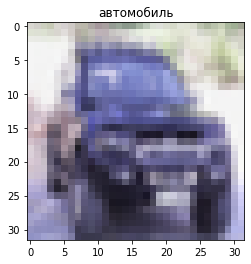

In [7]:
N = 9

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

Задание 1.
Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [8]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 109s 139ms/step - loss: 2.2724 - accuracy: 0.1208 - val_loss: 2.0149 - val_accuracy: 0.2675
Epoch 2/10
782/782 [==============================] - 110s 141ms/step - loss: 2.0239 - accuracy: 0.2543 - val_loss: 2.0079 - val_accuracy: 0.2687
Epoch 3/10
782/782 [==============================] - 107s 137ms/step - loss: 1.8643 - accuracy: 0.3216 - val_loss: 1.7516 - val_accuracy: 0.3728
Epoch 4/10
782/782 [==============================] - 106s 136ms/step - loss: 1.7054 - accuracy: 0.3758 - val_loss: 1.5983 - val_accuracy: 0.4188
Epoch 5/10
782/782 [==============================] - 107s 137ms/step - loss: 1.6007 - accuracy: 0.4110 - val_loss: 1.5468 - val_accuracy: 0.4381
Epoch 6/10
782/782 [==============================] - 107s 136ms/step - loss: 1.5298 - accuracy: 0.4397 - val_loss: 1.4759 - val_accuracy: 0.4683
Epoch 7/10
782/782 [==============================] - 107s 136ms/step - loss: 1.4592 - accuracy: 0.4699 - val_loss: 1.3797 -

In [10]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 20s - loss: 1.2171 - accuracy: 0.5691
313/313 - 4s - loss: 1.2374 - accuracy: 0.5662
train_loss: 1.2170846462249756, train_accuracy: 0.5690799951553345
test_loss: 1.2374165058135986, test_accuracy: 0.5662000179290771


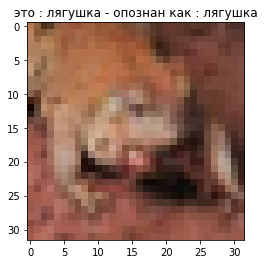

In [11]:
N = 5
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Задание 2.
Оценить рост точности при увеличении ширины сети (больше фильтров)

In [12]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [13]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 268s 342ms/step - loss: 2.2428 - accuracy: 0.1483 - val_loss: 1.9748 - val_accuracy: 0.2856
Epoch 2/10
782/782 [==============================] - 266s 341ms/step - loss: 1.9745 - accuracy: 0.2825 - val_loss: 1.8612 - val_accuracy: 0.3386
Epoch 3/10
782/782 [==============================] - 265s 339ms/step - loss: 1.8326 - accuracy: 0.3420 - val_loss: 1.6444 - val_accuracy: 0.4192
Epoch 4/10
782/782 [==============================] - 268s 342ms/step - loss: 1.6718 - accuracy: 0.3953 - val_loss: 1.5157 - val_accuracy: 0.4519
Epoch 5/10
782/782 [==============================] - 265s 338ms/step - loss: 1.5571 - accuracy: 0.4353 - val_loss: 1.4356 - val_accuracy: 0.4824
Epoch 6/10
782/782 [==============================] - 267s 342ms/step - loss: 1.4776 - accuracy: 0.4631 - val_loss: 1.4566 - val_accuracy: 0.4860
Epoch 7/10
782/782 [==============================] - 266s 340ms/step - loss: 1.3935 - accuracy: 0.4985 - val_loss: 1.3276 -

In [14]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 53s - loss: 1.1039 - accuracy: 0.6104
313/313 - 10s - loss: 1.1384 - accuracy: 0.5966
train_loss: 1.1039037704467773, train_accuracy: 0.6104000210762024
test_loss: 1.138423204421997, test_accuracy: 0.5965999960899353


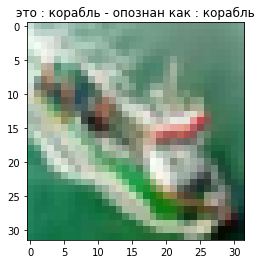

In [15]:
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Задание 3.
Оценить рост точности при увеличении глубины сети (больше слоев)

In [16]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [17]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 112s 142ms/step - loss: 2.2966 - accuracy: 0.1095 - val_loss: 2.1890 - val_accuracy: 0.2065
Epoch 2/10
782/782 [==============================] - 108s 138ms/step - loss: 2.1595 - accuracy: 0.1928 - val_loss: 2.0252 - val_accuracy: 0.2406
Epoch 3/10
782/782 [==============================] - 106s 136ms/step - loss: 2.0491 - accuracy: 0.2249 - val_loss: 2.1169 - val_accuracy: 0.2381
Epoch 4/10
782/782 [==============================] - 107s 136ms/step - loss: 1.9002 - accuracy: 0.2829 - val_loss: 1.7674 - val_accuracy: 0.3496
Epoch 5/10
782/782 [==============================] - 106s 136ms/step - loss: 1.8081 - accuracy: 0.3242 - val_loss: 1.6949 - val_accuracy: 0.3728
Epoch 6/10
782/782 [==============================] - 107s 137ms/step - loss: 1.7263 - accuracy: 0.3590 - val_loss: 1.6644 - val_accuracy: 0.3970
Epoch 7/10
782/782 [==============================] - 107s 136ms/step - loss: 1.6322 - accuracy: 0.3950 - val_loss: 1.5723 -

In [18]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 21s - loss: 1.3374 - accuracy: 0.5151
313/313 - 4s - loss: 1.3492 - accuracy: 0.5112
train_loss: 1.3373967409133911, train_accuracy: 0.5151200294494629
test_loss: 1.3491904735565186, test_accuracy: 0.5112000107765198


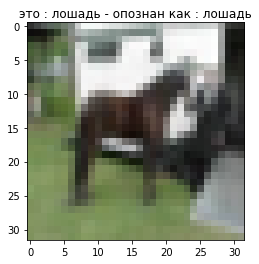

In [19]:
N = 20
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()